# Preliminaries

Python version: python 3.5.2

# Take aways

- All the variants reached global minima.
- Both Polyak's momentum and Nesterov's Momentum have the highest loss variance as these methods overshoot the minima several times.
- Adam worked better than the rest. Adam took the least number of epochs to reach minima and has the least loss variance.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# Rosenbrock function

$$ f(x,y) = x^2+100(y-x^2)^2 $$

In [2]:
def rosenbrock(x,y):
    return (x)**2 + 100.*(y-x*x)**2

# Visualization of Rosenbrock function

x and y values are varied from -2.5 to 2.5 with stride of 0.05; The correspoding f values are calculated and plotted in 3D.

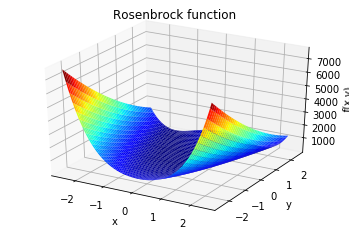

In [3]:
x, y = np.meshgrid(np.arange(-2.5, 2.5, 0.05), np.arange(-2.5, 2.5, 0.05)) 
z = rosenbrock(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock function')
ax.plot_surface(x, y, z, cmap='jet')
plt.show()

# Gradients of rosenbrock function

\begin{align}
    \frac{\partial f}{\partial x}  &= 2x - 400x(y-x^2)\\
    \frac{\partial f}{\partial f}  &= 200(y-x^2)\
\end{align}

In [4]:
# function to find the gradients of f w.r.t x and y
def calc_dW(W):
    dx = 2.* W[0] - ((400. * W[0]) * (W[1]-(W[0])**2))
    dy = 200. * (W[1]-(W[0])**2)
    return np.array([dx,dy])

# Gradient Descent

Update rule:

\begin{align}
    w_{t+1} &= w_{t} - \eta * \nabla w_t\\
\end{align}


The number of epochs to reach convergence is:  4972
Error after last epoch is 2.4915328975654013e-06 and the correspoding weights are [-1.57845894e-03  2.54232782e-06]


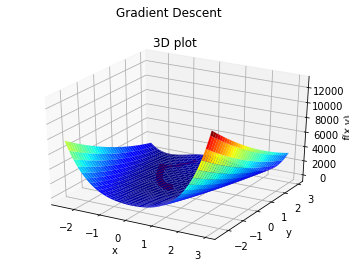

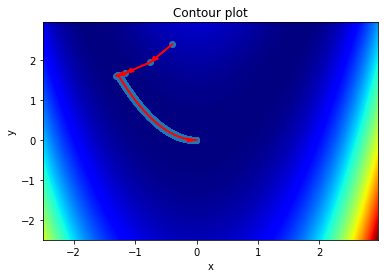

In [5]:
# minimization

E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.001

Ehistory = []
Whistory = []

#convergence is reached when diffrence between the consequitve losses is very minimal
while(abs(E-E_prev) > 1e-8): 
    E_prev = E
    dW = calc_dW(W)
    W = W-(eta*dW)
    Whistory.append(W)
    E = rosenbrock(W[0],W[1])
    Ehistory.append(E)
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))

#plotting 3D
x, y = np.meshgrid(np.arange(-2.5,3, 0.05), np.arange(-2.5, 3, 0.05)) 
z = rosenbrock(x,y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient Descent')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

#contour plot

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(3):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Gradient descent with Polyak's momentum

Update rule:

\begin{align}
    update_t &= \beta * update_{t-1} + \eta* \nabla w_t\\
    w_{t+1} &= w_{t} - update_t
\end{align}

The number of epochs to reach convergence is:  4554
Error after last epoch is 2.4411466328925974e-06 and the correspoding weights are [-1.56241684e-03  2.48996131e-06]


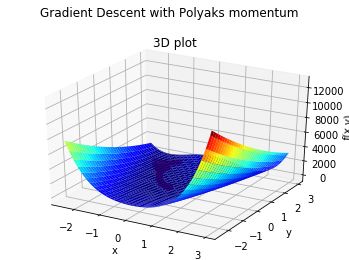

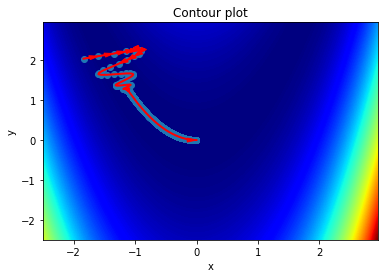

In [6]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.0001
beta = 0.9
update = np.array([0,0])
Ehistory = []
Whistory = []

while(abs(E-E_prev) > 1e-8):
    E_prev = E
    dW = calc_dW(W)
    update = (beta * update) + (eta*dW)
    W = W - update
    Whistory.append(W)
    E = rosenbrock(W[0],W[1])
    Ehistory.append(E)
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with Polyaks momentum')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(10):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Gradient Descent with  Nesterov's Momentum

Update rule:

\begin{align}
    w_{look-ahead} &= w_t - \beta * update_{t-1}\\
    update_t &= \beta * update_{t-1} + \eta* \nabla w_{look-ahead}\\
    w_{t+1} &= w_{t} - update_t
\end{align}

The number of epochs to reach convergence is:  5237
Error after last epoch is 2.443545774621327e-06 and the correspoding weights are [-1.56318442e-03  2.49252004e-06]


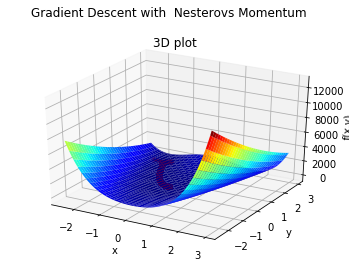

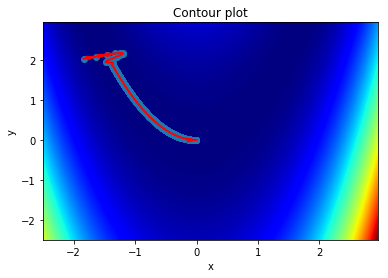

In [7]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.0001
beta = 0.9
update = np.array([0,0])
Ehistory = []
Whistory = []

while(abs(E-E_prev) > 1e-8):
    E_prev = E
    Wlook_ahead = W - (beta * update)
    dWlook_ahead = calc_dW(Wlook_ahead)
    update = (beta * update) + (eta*dWlook_ahead)
    W = W - update
    Whistory.append(W)
    E = rosenbrock(W[0],W[1])
    Ehistory.append(E)
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with  Nesterovs Momentum')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(3):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Adam optimizer

Update rule:

\begin{align}
    m_t &= \beta _1 * m_{t-1} + (1- \beta _1)*\nabla w_{t}\\
    u_t &= \beta _2 * u_{t-1} + (1- \beta _2)*(\nabla w_{t})^2\\
    \hat{m}_{t} &= \frac{m_{t}}{1-\beta_{1}^{t}}\\
    \hat{u}_{t} &= \frac{u_{t}}{1-\beta_{2}^{t}}\\
    w_{t+1} &= w_{t} - \frac{\eta}{\sqrt{\hat{u}_{t}+\epsilon}}*\hat{m}_{t}
\end{align}

The number of epochs to reach convergence is:  600
Error after last epoch is 2.3034756975673324e-06 and the correspoding weights are [0.00035332 0.00014773]


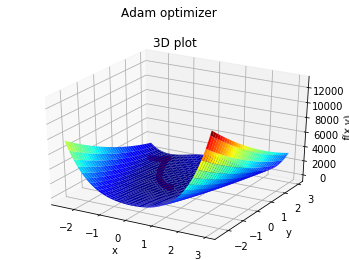

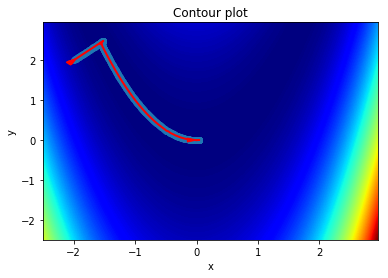

In [8]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.01
beta1 = 0.9
beta2 = 0.9
epsilon = 1e-8
m = np.array([0,0])
u = np.array([0,0])
Ehistory = []
Whistory = []
t = 0
while(abs(E-E_prev) > 1e-8):
    t=t+1
    E_prev = E
    dW = calc_dW(W)
    m = (beta1*m) + ((1.-beta1)*dW)
    u = (beta2*u) + ((1.-beta2)*(dW**2))
    m_hat = m/(1-(beta1)**t)
    u_hat = u/(1-(beta2)**t)
    W = W - ((eta*m_hat)/(np.sqrt(u_hat+epsilon)))
    Whistory.append(W)
    E = rosenbrock(W[0],W[1])
    Ehistory.append(E)
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Adam optimizer')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(3):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()